In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#load the house price dataset
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Feature selection

In [4]:
#unwanted columns: area_type, availabilty,society,balcony
#df["area_type"].unique() #non impacting
#df["availability"].unique() #non impacting
#df["location"].unique() #no need to remove because it is impacting on output
#df["size"].unique() #no need to remove
#df["society"].unique() #many null values so remove
#df["total_sqft"].unique() #no need to remove
#df["bath"].unique() #no need to remove
#df["balcony"].unique() #many null values --so remove
#df["price"].unique()  #very impportant


df = df.drop(["area_type","availability","society","balcony"],axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Handling missing values

In [6]:
#Handle missing values in location
# df[df["location"].isnull()] #we may loose data

# df["location"].value_counts() #count of houses in whitefield and Sarjapur  Road  are more so we can replace null value with any of these
#will replace that null value with sarjapur road
df["location"] = df["location"].fillna("Sarjapur  Road")
df["location"].value_counts()


location
Whitefield                         540
Sarjapur  Road                     400
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

In [7]:
df.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
#Handle missing values in size column
df[df["size"].isnull()]
df["size"].value_counts() #most of the values are in 2bhk replace with 2bhk
df["size"] = df["size"].fillna("2 BHK")
df["size"].value_counts()



size
2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [9]:
#handling missing values in bath column
#it is in float datatype
#so going with mean or median
df[df["bath"].isnull()]

med_bath = df["bath"].median()
med_bath

df["bath"] = df["bath"].fillna(med_bath)

df["bath"] =df["bath"].astype(int) #converting float to int
df


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5,120.00
2,Uttarahalli,3 BHK,1440,2,62.00
3,Lingadheeranahalli,3 BHK,1521,3,95.00
4,Kothanur,2 BHK,1200,2,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4,231.00
13316,Richards Town,4 BHK,3600,5,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2,60.00
13318,Padmanabhanagar,4 BHK,4689,4,488.00


In [10]:
#Drop duplicate rows
df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12438 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12438 non-null  object 
 1   size        12438 non-null  object 
 2   total_sqft  12438 non-null  object 
 3   bath        12438 non-null  int64  
 4   price       12438 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 583.0+ KB


Feature Engineering

In [11]:
#handling location column
df["location"].value_counts()
df["location"] = df["location"].apply(lambda x: x.strip()) #it is removing spaces
df["location"].value_counts()

#Fetching locations which are less than 10 replacing them with others -->not removing them

loc=df["location"].value_counts()
loc_less_than_10=loc[loc<=10]

df["location"]=df["location"].apply(lambda x: "others" if x in loc_less_than_10 else x)
df["location"].value_counts()

location
others                  2927
Whitefield               508
Sarjapur  Road           365
Electronic City          275
Thanisandra              226
                        ... 
Tindlu                    11
Banashankari Stage V      11
Doddakallasandra          11
Thyagaraja Nagar          11
HAL 2nd Stage             11
Name: count, Length: 232, dtype: int64

In [12]:
#handling size column
# it has that object things like bhk , bedroom ,rk
#so creating another column with bhk

out = [int(i.split()[0]) for i in df["size"]]
df["bhk"] = out
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5,120.00,4
2,Uttarahalli,3 BHK,1440,2,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3,95.00,3
4,Kothanur,2 BHK,1200,2,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3,112.00,3
13315,Whitefield,5 Bedroom,3453,4,231.00,5
13316,others,4 BHK,3600,5,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2,60.00,2


In [13]:
#handling total_sqft column
df["total_sqft"].unique() #this should be in integer but there are in strings are also in range

def clean_sqft(sqft):     
    l = sqft.split("-")
    if len(l)==2:
        return float(l[0])+float(l[1])/2  #finding avg by converting to float
    try:
       return float(l[0]) #this floast also throws an error #some floats may not convert so thats why taking none
    except:
        return None

df["total_sqft"] = df["total_sqft"].apply(clean_sqft)
df["total_sqft"] = df["total_sqft"].fillna(round(df["total_sqft"].mean()))  




In [14]:
#CREATING price_per_sqft 
# formula:price/total_sqft
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"]
df


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258.545136


handling outliers

In [15]:
#handling outliers in total sqft
#not doing size beacuse we have bhk column 

df.describe() #we can see min and max values 

df[df["total_sqft"]<300] #minimum threshold value is 300

#total_sqft is always related to bhk
# total_sqft/bhk>=300 #ex:if it is 2 bhk there should be 1200 right

df = df[df["total_sqft"]/df["bhk"]>=300]
df.describe()
 

,total_sqft,bath,price,bhk,price_per_sqft
count,11705.000000,11705.000000,11705.000000,11705.000000,11705.000000
mean,1628.246502,2.579667,114.455648,2.666809,6377.474059
std,1313.481400,1.099383,156.421987,0.995743,4291.202802
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1124.000000,2.000000,50.000000,2.000000,4207.119741
50%,1320.000000,2.000000,71.000000,3.000000,5326.086957
75%,1735.000000,3.000000,120.000000,3.000000,6989.247312
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


in total_sqft column we have some rooms less than 300 sqft those are called outliers

In [16]:
#handling outliers in bhk
df = df[df["bhk"]<=6]


In [17]:
#handling outliers in bath columns  
#formula : bhk+2
# sns.boxplot(x="bhk",data=df)

df = df[df["bath"]<df["bhk"]+2]
#ex : 2bath , 2bh   # 2<2+2 -->2<4
df




,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258.545136


<Axes: xlabel='price_per_sqft'>

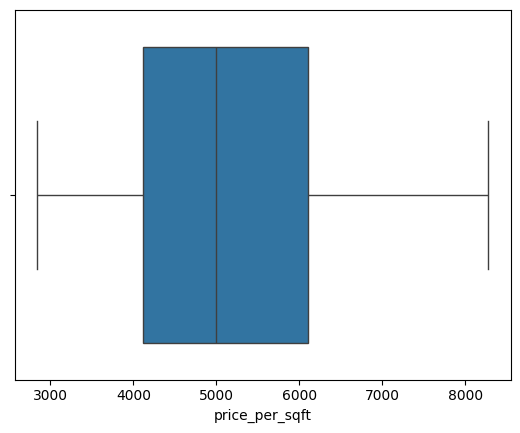

In [18]:
#handling outliers in price pee sqft
# sns.boxplot(x="price_per_sqft",data=df)

#IQR Method --> to detect outliers
q1 = df["price_per_sqft"].quantile(0.25)
q3 = df["price_per_sqft"].quantile(0.75)

IQR = q3-q1

lower = q1-0.5*IQR
upper = q3+0.5*IQR

df = df[(df["price_per_sqft"]>=lower) & (df["price_per_sqft"]<=upper)]
sns.boxplot(x="price_per_sqft",data=df)





In [19]:
df.reset_index(inplace=True)
df = df.drop(["index","size","price_per_sqft"],axis=1)
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2,39.07,2
1,Chikka Tirupathi,2600.0,5,120.00,4
2,Uttarahalli,1440.0,2,62.00,3
3,Lingadheeranahalli,1521.0,3,95.00,3
4,Kothanur,1200.0,2,51.00,2
...,...,...,...,...,...
9429,Rachenahalli,1050.0,2,52.71,2
9430,Bellandur,1262.0,2,47.00,2
9431,Green Glen Layout,1715.0,3,112.00,3
9432,Whitefield,3453.0,4,231.00,5


Model Training

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error

In [21]:
encoder = LabelEncoder()
df["encoded_loc"] = encoder.fit_transform(df["location"])
df.head()

,location,total_sqft,bath,price,bhk,encoded_loc
0,Electronic City Phase II,1056.0,2,39.07,2,75
1,Chikka Tirupathi,2600.0,5,120.00,4,57
2,Uttarahalli,1440.0,2,62.00,3,216
3,Lingadheeranahalli,1521.0,3,95.00,3,154
4,Kothanur,1200.0,2,51.00,2,146


In [22]:
#divide into input and output
X = df.drop(["location","price"],axis=1)
y = df.price

In [23]:
#split the data into training and testing data
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [24]:
#model training

model = RandomForestRegressor(random_state=42)
params = {
    "n_estimators":[100,150,200,250,300],
    "max_depth":[3,4,5,6,7]
}

grid = GridSearchCV(estimator = model,param_grid=params,cv=5)
grid.fit(Xtrain,ytrain)
print("Best params:", grid.best_params_)
print("Best score:" , grid.best_score_)


Best params: {'max_depth': 6, 'n_estimators': 100}
Best score: 0.837890124599261


In [25]:
ypred = grid.predict(Xtest)
ypred

array([81.70811547, 62.48712229, 52.0802134 , ..., 87.74631532,
       87.5174548 , 46.21219355], shape=(2831,))

In [26]:
print("Training eff:", grid.score(Xtrain,ytrain))
print("Testing eff:", grid.score(Xtest,ytest)) #not overfitting beacuse it under 10 percent difference only


Training eff: 0.8904543025268997
Testing eff: 0.8097620540854027


In [27]:
print("R2:", r2_score(ytest,ypred))
print("MAE:", mean_absolute_error(ytest,ypred))

R2: 0.8097620540854027
MAE: 14.875133190181195


In [28]:
#save cleaned dataset
df.to_csv("cleaned_df.csv")

In [29]:
#save the model in pickle file
import pickle
with open("RF_model.pkl","wb") as file:  #wb:writing binary
    pickle.dump(grid,file)  #dump is used to save the file